# Wiring diagrams and syntactic expressions


Morphisms in a monoidal category can be represented as syntactic expressions,
such as $f \cdot g$ and $f \otimes g$, and also as [wiring
diagrams](@ref wiring_diagram_basics), aka *string diagrams*. Catlab provides
facilities for transforming between these two representations.

In [1]:
using Catlab.Doctrines, Catlab.WiringDiagrams
using Catlab.Graphics

function show_diagram(d::WiringDiagram)
  to_graphviz(d, orientation=LeftToRight, labels=false)
end

show_diagram (generic function with 1 method)

## Expressions to diagrams

Converting a morphism expression to a wiring diagram is conceptually and
algorithmically simple, because every expression determines a unique diagram.

As a simple example, here is the monoidal product of two generators, $f$ and
$g$, first as an expression (displayed using LaTeX) and then as a wiring
diagram (displayed using Graphviz).

In [2]:
A, B, C, D, E = Ob(FreeCartesianCategory, :A, :B, :C, :D, :E)
f = Hom(:f, A, B)
g = Hom(:g, B, C)

expr = f ⊗ g

otimes(f,g)

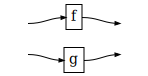

In [3]:
show_diagram(to_wiring_diagram(expr))

Here is a monoidal product of compositions:

In [4]:
h = Hom(:h, C, D)
k = Hom(:k, D, E)

expr = (f ⋅ g) ⊗ (h ⋅ k)

otimes(compose(f,g),compose(h,k))

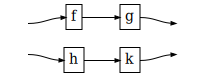

In [5]:
show_diagram(to_wiring_diagram(expr))

## Diagrams to expressions

Converting a wiring diagram to a syntactic expression is algorithmically more
challenging, due to the fact that a single wiring diagram generally admits
many different representations as an expression. Thus, a particular expression
must be singled out.

To bring this out, we define a function that round-trips a morphism expression
to a wiring diagram and then back to an expression.

In [6]:
function roundtrip_expr(expr::FreeCartesianCategory.Hom)
  d = to_wiring_diagram(expr)
  to_hom_expr(FreeCartesianCategory, d)
end

roundtrip_expr (generic function with 1 method)

We can recover the expression just considered above:

In [7]:
roundtrip_expr((f ⋅ g) ⊗ (h ⋅ k))

otimes(compose(f,g),compose(h,k))

But here is a different expression that round-trips to the same thing:

In [8]:
roundtrip_expr((f ⊗ h) ⋅ (g ⊗ k))

otimes(compose(f,g),compose(h,k))

The equality of these two expressions,

$$
(f \cdot g) \otimes (h \cdot k) = (f \otimes h) \cdot (g \otimes k),
$$

is the *interchange law* in a monoidal category. It says that composition and
monoidal products can be interchanged. As this example shows, the conversion
algorithm in Catlab favors products over composition, placing products towards
the root of the expression tree wherever possible.
Other laws can be discovered by this procedure. Since we are working in a
[cartesian monoidal
category](https://ncatlab.org/nlab/show/cartesian+monoidal+category),
operations of copying, $\Delta_A: A \to A \otimes A$, and deleting,
$\lozenge_A: A \to I$, are available.

Consider the operation of copying the product $A \otimes B$.

In [9]:
expr = mcopy(A ⊗ B)

mcopy(otimes(A,B))

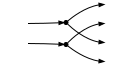

In [10]:
show_diagram(add_junctions!(to_wiring_diagram(expr)))

In [11]:
roundtrip_expr(expr)

compose(otimes(mcopy(A),mcopy(B)),otimes(id(A),braid(A,B),id(B)))

The equation just witnessed,

$$
\Delta_{A \otimes B} = (\Delta_A \otimes \Delta_B) \cdot (1_A \otimes \sigma_{A,B} \otimes 1_B),
$$

is one of the *coherence laws* for cartesian products
([arXiv:0908.3347](https://arxiv.org/abs/0908.3347), Table 7). Another
coherence law for products is

$$
\lozenge_{A \otimes B} = \lozenge_A \otimes \lozenge_B.
$$

In [12]:
expr = delete(A ⊗ B)

delete(otimes(A,B))

In [13]:
roundtrip_expr(expr)

otimes(delete(A),delete(B))